In [84]:
#importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [212]:
#Reading the data
data = pd.read_csv('/content/Coupen.csv')
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


**EDA**

 Summary Statistics

In [86]:
# Summary statistics for numerical columns
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
# Summary for categorical columns
data.describe(include=['object'])

,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,12681,12679,12684,12684,12684,12681,12684,12684,12681,12684,12684,12684,108,12577,12467,12531,12554,12495
unique,3,4,3,5,5,2,2,8,5,6,25,9,5,5,5,5,5,5
top,No Urgent Place,Alone,Sunny,6PM,Coffee House,1d,Female,21,Married partner,Some college - no degree,Unemployed,$25000 - $37499,Scooter and motorcycle,never,less1,1~3,1~3,less1
freq,6281,7303,10069,3230,3996,7089,6511,2653,5099,4351,1870,2013,22,5197,3385,4672,5376,6077


In [88]:
#identifying columns
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [89]:
#shape of data
data.shape

(12684, 26)

In [91]:
#basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12681 non-null  object
 1   passanger             12679 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12681 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12681 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [92]:
# Checking for missing values
data.isnull().sum()


destination                 3
passanger                   5
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  3
gender                      0
age                         0
maritalStatus               3
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 153
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

**visualisation**

In [93]:
#filter missing value columns
missing_val=data.columns[data.isnull().any()]
missing_val

Index(['destination', 'passanger', 'expiration', 'maritalStatus', 'car', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'],
      dtype='object')

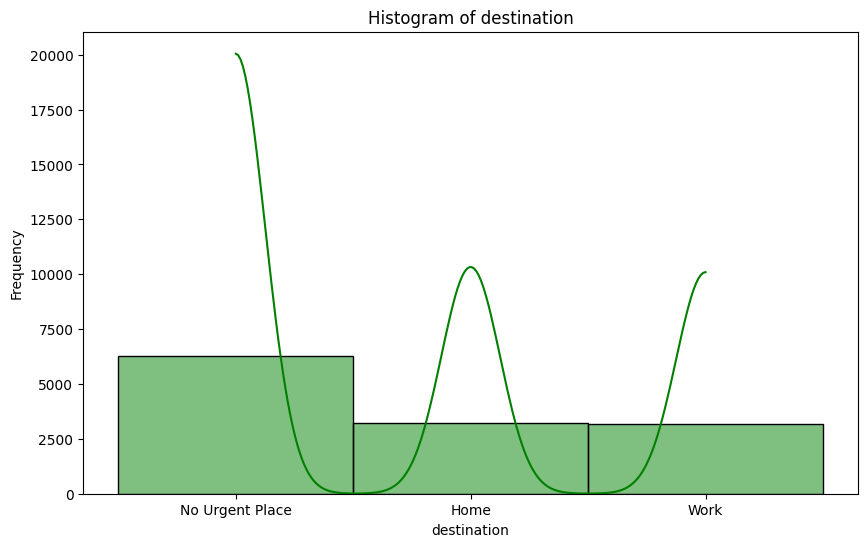

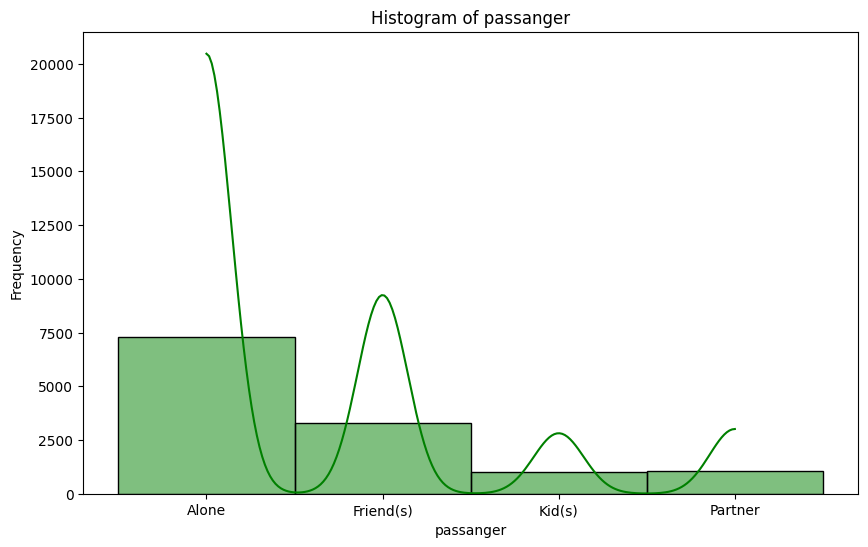

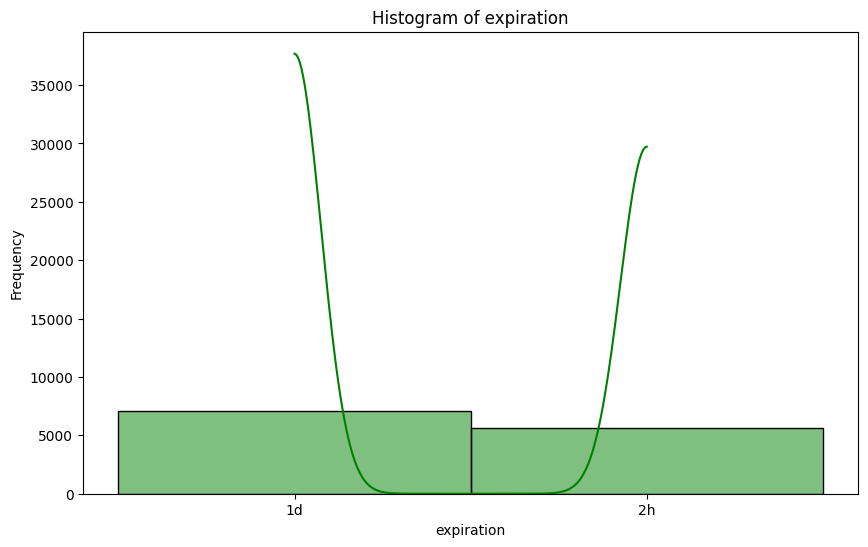

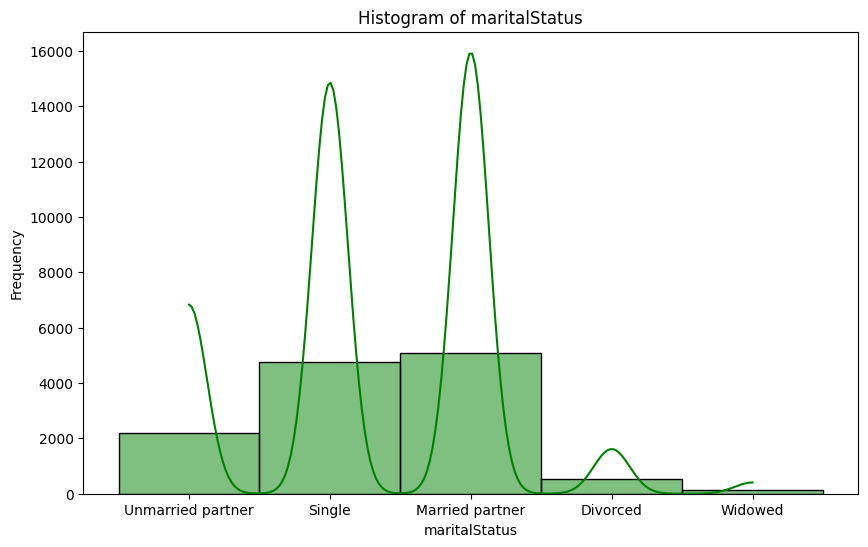

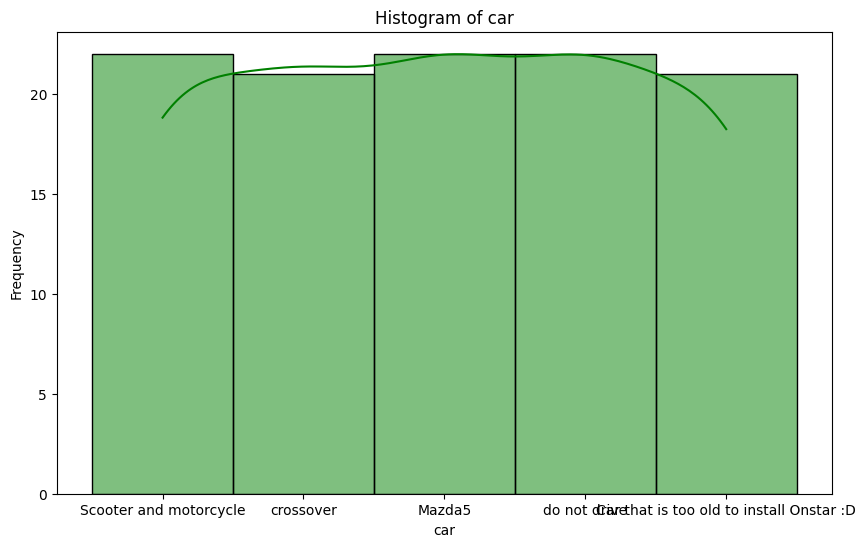

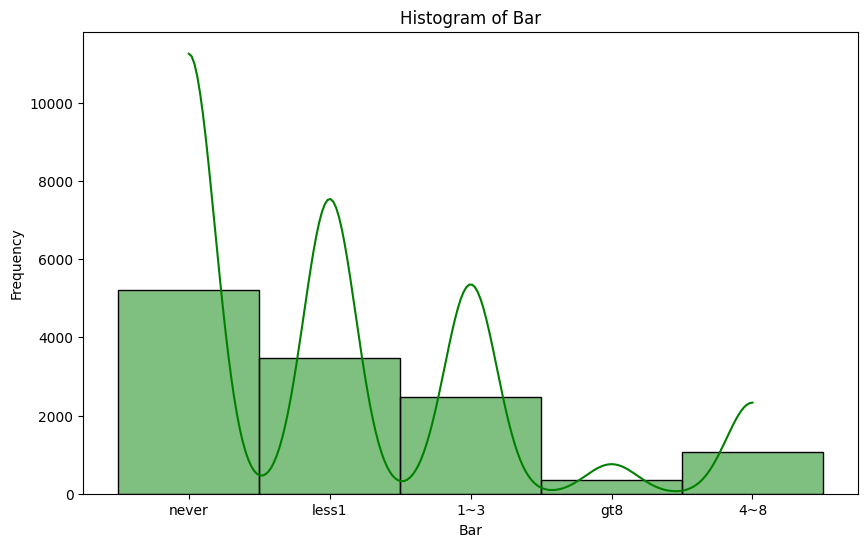

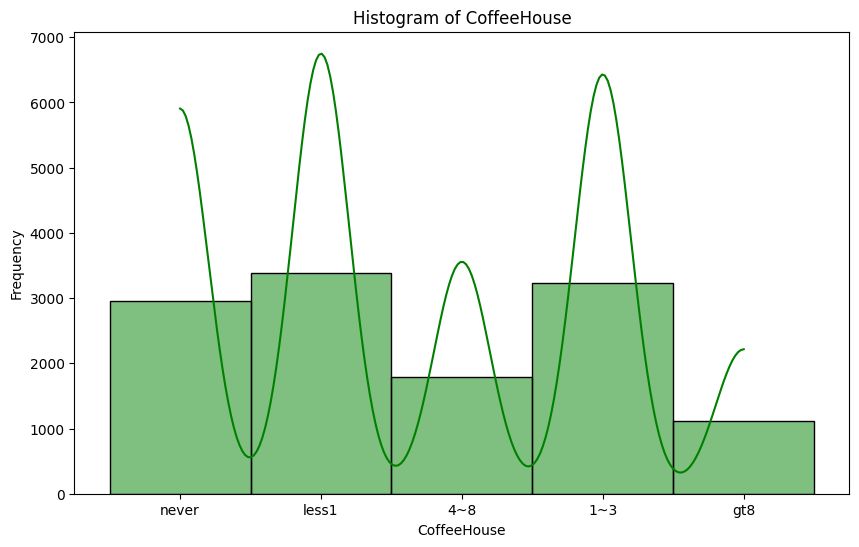

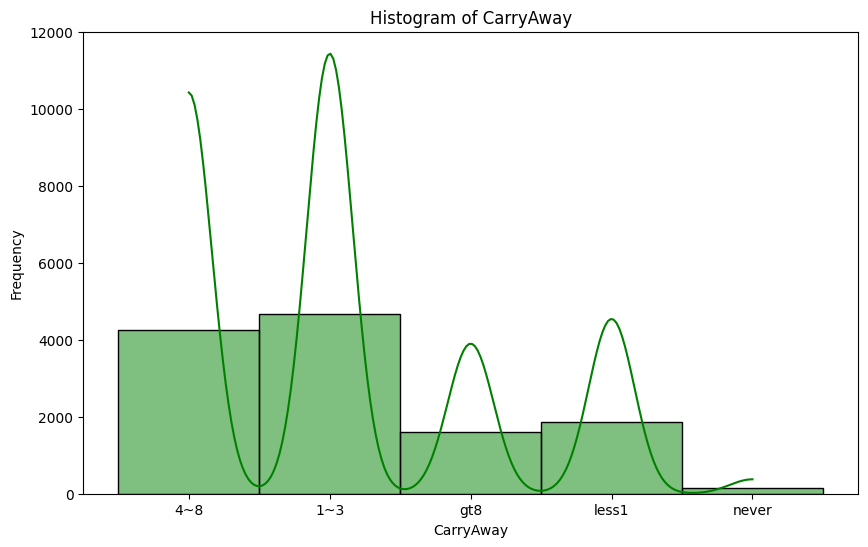

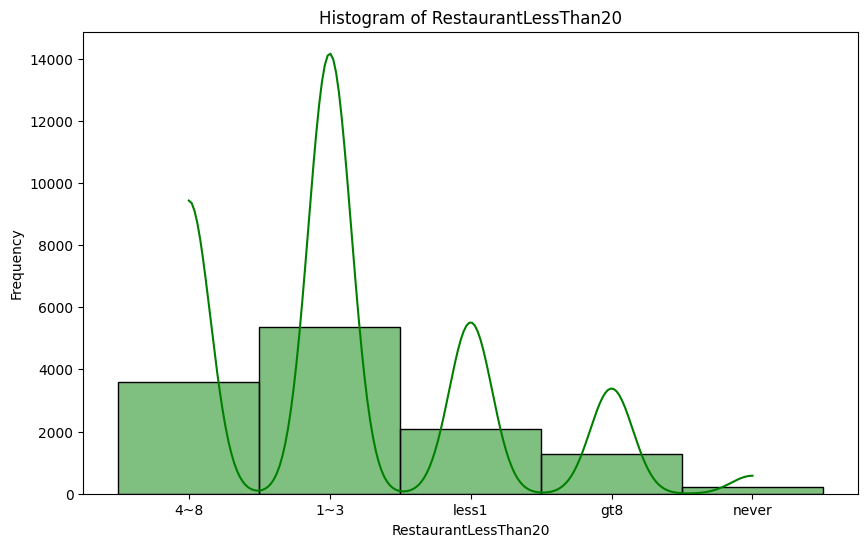

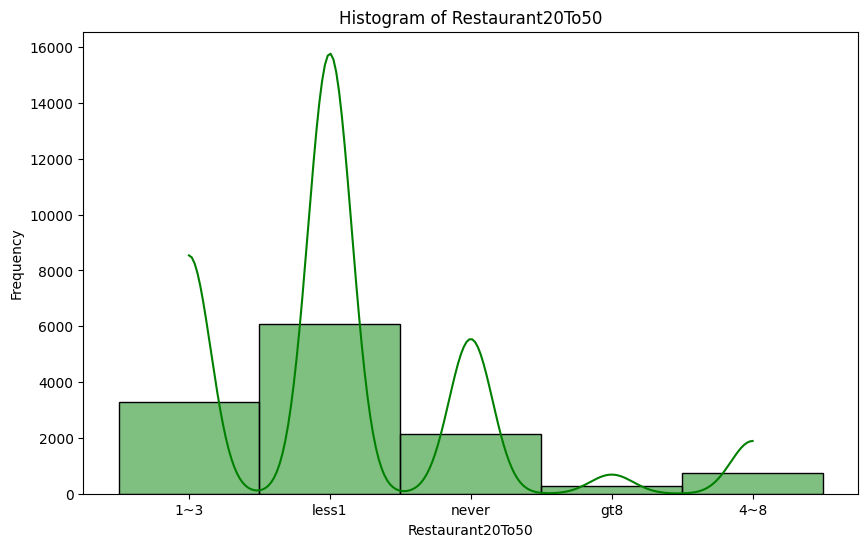

In [94]:
# Plot histograms for each column with missing values
for col in missing_val:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col],kde=True, bins=30, color='Green')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

### **Preprocessing**

Missing values

In [235]:
data1 = data.copy()


In [236]:
# Dropping columns
data1 = data1.drop(columns=['car'])
data1.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [237]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

In [238]:
# Fill missing values for categorical columns with the mode
categorical_columns_with_missing = ['destination', 'passanger', 'expiration', 'maritalStatus', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for col in categorical_columns_with_missing:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [239]:
missing_values_after = data1.isnull().sum()
missing_values_after

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

outliers


In [240]:
# Identify numeric columns
num_cols = data.select_dtypes(include=np.number).columns
num_cols

Index(['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y'],
      dtype='object')

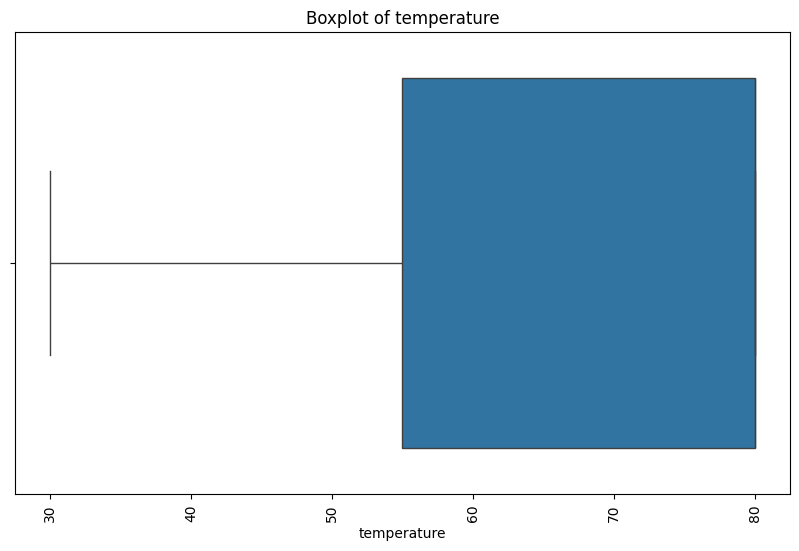

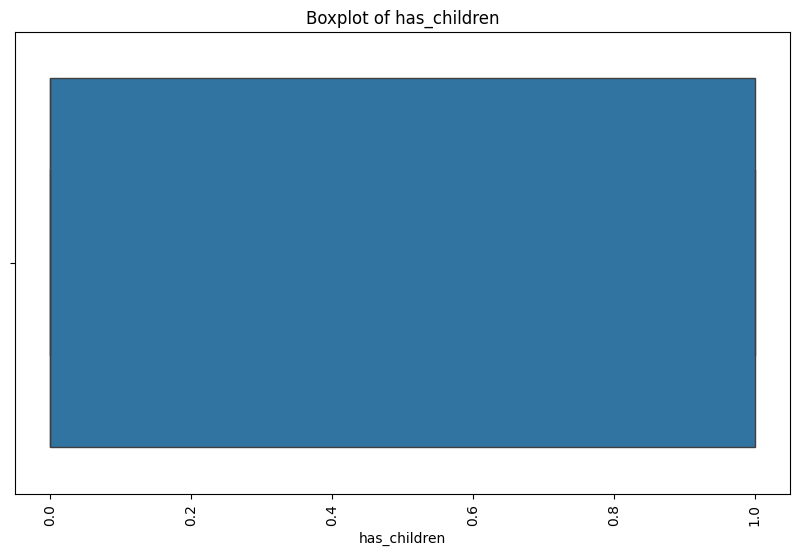

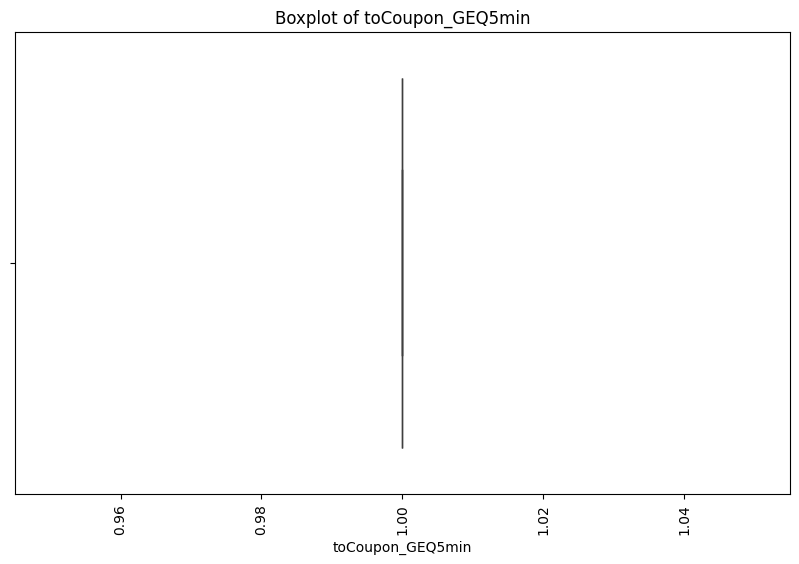

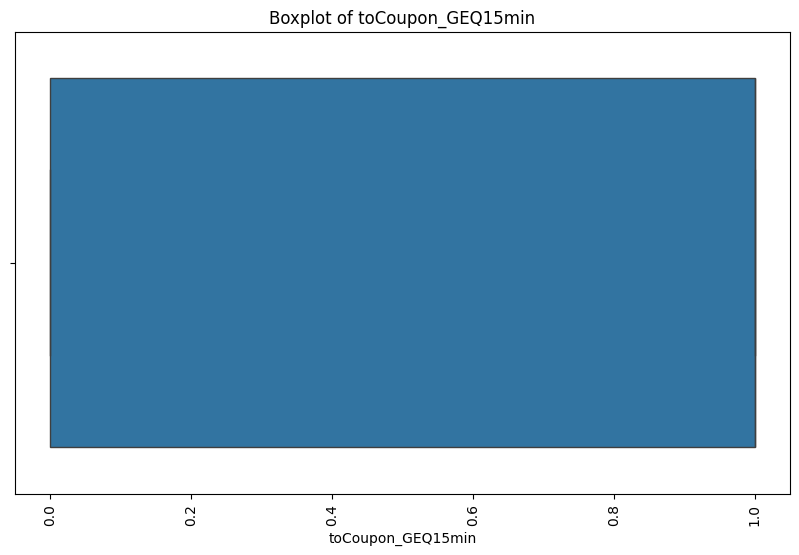

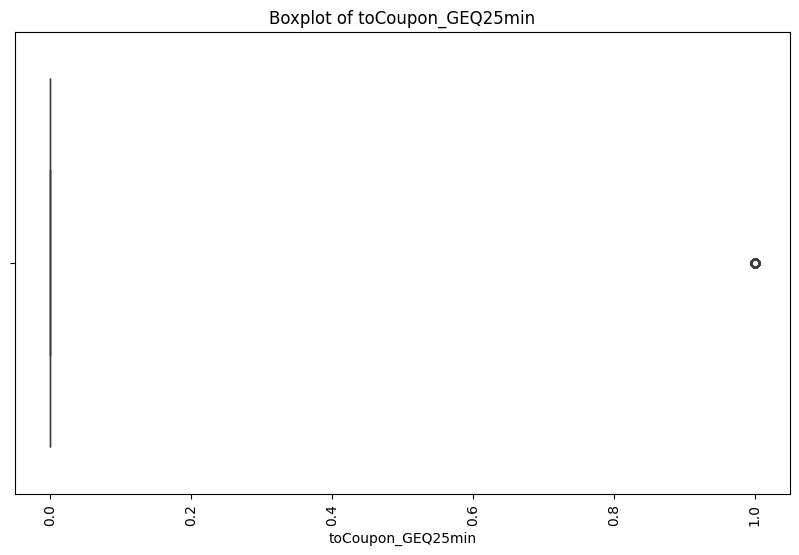

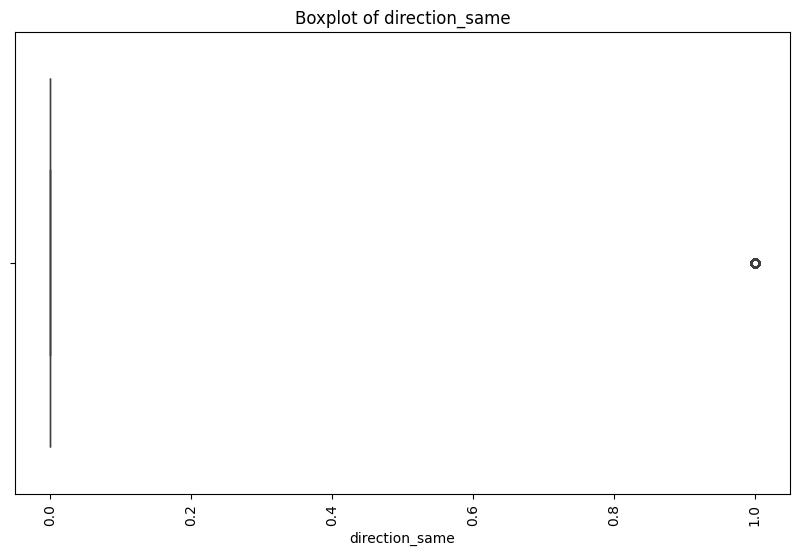

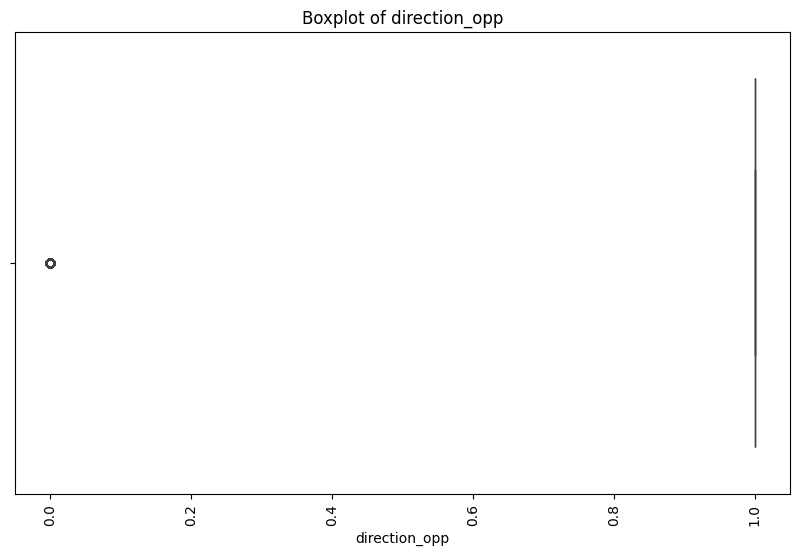

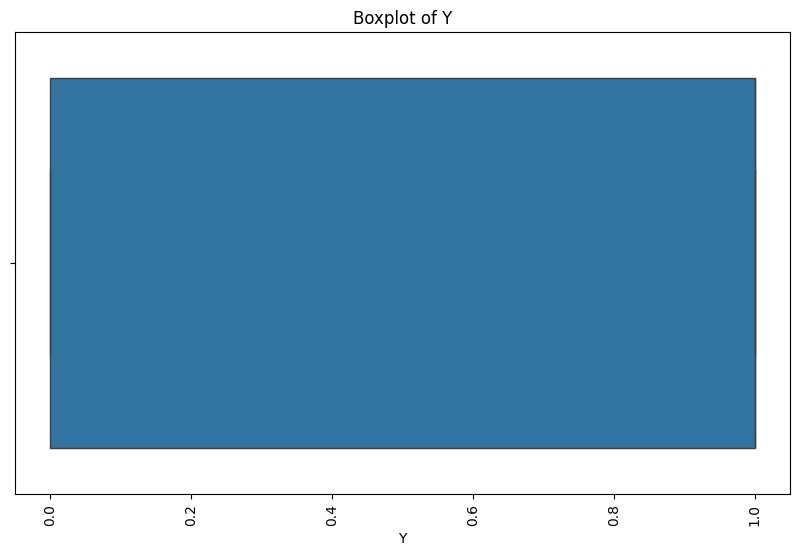

In [241]:
# Loop through each numeric column and create a boxplot
for col in num_cols:
    plt.figure(figsize=(10, 6))  # Set the size of each individual plot
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.xticks(rotation=90)
    plt.show()



In [242]:
data[numerical_columns]

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,55,1,1,0,0,0,1,1
1,80,1,1,0,0,0,1,0
2,80,1,1,1,0,0,1,1
3,80,1,1,1,0,0,1,0
4,80,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...
12679,55,0,1,0,0,1,0,1
12680,55,0,1,0,0,0,1,1
12681,30,0,1,0,0,1,0,0
12682,30,0,1,1,1,0,1,0


In [244]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = data.select_dtypes(include=['number']).columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [250]:
# Scale the numerical features
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [251]:
#split data
from sklearn.model_selection import train_test_split

X = data.drop('Y', axis=1)
y = data['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [252]:
# Identify the numerical columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

In [253]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical features
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [254]:
# Display the scaled features
print(X.head())

       destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny    -0.433430   2PM   
1  No Urgent Place  Friend(s)   Sunny     0.871799  10AM   
2  No Urgent Place  Friend(s)   Sunny     0.871799  10AM   
3  No Urgent Place  Friend(s)   Sunny     0.871799   2PM   
4  No Urgent Place  Friend(s)   Sunny     0.871799   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

     Bar CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0  never       never       1~3                  4~8              1~3   
1  never       never       1~3              

In [257]:
from sklearn.preprocessing import OneHotEncoder

# Assuming 'destination' is the categorical column
encoder = OneHotEncoder(handle_unknown='ignore')  # 'ignore' to handle new categories in test data
encoded_data = encoder.fit_transform(X_train[['destination']])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame.sparse.from_spmatrix(encoded_data, columns=encoder.get_feature_names_out(['destination']))

# Drop the original 'destination' column and concatenate the encoded DataFrame
X_train = X_train.drop('destination', axis=1).join(encoded_df)

Train models

In [264]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Make sure these column names actually exist in your X_train and X_test DataFrames
# Also, ensure that all elements within the list are of the same type (either all strings or all integers)
categorical_columns = ['destination', 'other_categorical_column1', ...]
numerical_columns = ['temperature', 'humidity', ...]  # List numerical column names here

# Create a ColumnTransformer to handle numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)  # Encode categorical features
    ])

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000), # This line ends with a comma, indicating continuation of the dictionary
    'Decision Tree': DecisionTreeClassifier(), # Proper indentation, aligned with 'Logistic Regression'
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
} # Closing curly brace for the dictionary

Fine-Tune the Best-Performing Model

In [271]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import warnings

warnings.filterwarnings("ignore")

In [273]:
# List of classifiers to evaluate
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Classifier": SVC(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [279]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder
import warnings
import pandas as pd # Import pandas for DataFrame manipulation

warnings.filterwarnings("ignore")

# Verify if 'destination' column exists in X_train
if 'destination' not in X_train.columns:
    print("Error: 'destination' column not found in X_train DataFrame.")
    # Investigate why the column is missing and fix the issue
else:
    # Assuming 'destination' is the column with string values 'Alone' and 'Partner'
    # Adjust the column name if it's different
    encoder = OneHotEncoder(handle_unknown='ignore')
    X_train_encoded = encoder.fit_transform(X_train[['destination']])

    # You'll need to similarly encode 'destination' in X_test before making predictions

    # List of classifiers to evaluate
    classifiers = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "Support Vector Classifier": SVC(),
        "Naive Bayes": GaussianNB(),
        "AdaBoost": AdaBoostClassifier(),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    }

    # Evaluate each classifier
    for name, clf in classifiers.items():
        # Cross-validation
        # Use the encoded training data
        scores = cross_val_score(clf, X_train_encoded, y_train, cv=5, scoring='accuracy')
        print(f"{name} - Cross-Validation Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

        # Fit the classifier on the training data
        clf.fit(X_train_encoded, y_train)



Error: 'destination' column not found in X_train DataFrame.


In [284]:
# Assuming 'Transported' is the target variable and it's binary (0 or 1)
# Check the data type of y_test
print(y_test.dtype)

# If y_test is not of integer type, convert it to integers
if y_test.dtype != 'int':
    y_test = y_test.astype(int)

y_pred_class = (y_pred > 0.5).astype(int)  # Convert probabilities to class labels (0 or 1)

# Calculate accuracy using the predicted class labels
accuracy = accuracy_score(y_test, y_pred_class)
print(f"{name} - Test Accuracy: {accuracy:.4f}")

# Print classification report
print(classification_report(y_test, y_pred_class))
print("\n" + "="*60 + "\n")

float64
Logistic Regression - Test Accuracy: 0.4746
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1128
           0       0.53      0.85      0.65      1409
           1       0.00      0.00      0.00         0

    accuracy                           0.47      2537
   macro avg       0.18      0.28      0.22      2537
weighted avg       0.29      0.47      0.36      2537





Hyperparameter tuning

In [ ]:
# Verify if y_train is empty
if y_train.empty:
    print("Error: y_train is empty. Check how it was created or assigned.")
    # Investigate and fix the issue with y_train
else:
    # Define the parameter grid for Random Forest
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }

    # Initialize the Random Forest model
    rf = RandomForestClassifier(random_state=42)

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

    # Verify the shapes of X_train and y_train before fitting the model
    print("Shape of X_train:", X_train.shape)
    print("Shape of y_train:", y_train.shape)

    # Fit GridSearchCV to the data
    grid_search.fit(X_train, y_train)  # Assuming y_train is correctly populated

    # Print the best parameters
    print(f"Best parameters found: {grid_search.best_params_}")

    # Evaluate the best model on the test set
    best_rf = grid_search.best_estimator_
    y_pred = best_rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Test Accuracy of the best Random Forest model: {accuracy}")